# Logistic Regression, LDA, QDA

we will go over how to perform logistic regression, quadratic discriminant analysis, and k-nearest neighbors in order to predict categorical responses in Python. We will use both StatsModels (for [logistic regression](http://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit)) and scikit-learn (for [logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression); [Quadratic discriminant analysis](https://scikit-learn.org/stable/modules/lda_qda.html); and [KNN classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)). Before starting, we will import the various Python packages we'll use in this lab. This will also include some of the [classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) from scikit-learn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import classes from scikit-learn for logistic regression, LDA, QDA, and KNN classification
# Also import convenience function for computing confusion matrices
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Load StatsModels API
# Note that if we wish to use R-style formulas, then we would load statsmodels.formula.api instead
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## The Stock Market Data

First, we'll look at some numerical summaries of the `Smarket` data set from the `ISLR` library. It consists of the percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, there are the following pieces of information:

- `Lag1` through `Lag5`: the percentage returns for each of the five previous trading days
- `Volume`: the number of shares traded on the previous day, in billions
- `Today`: the percentage return on the date in question
- `Direction`: whether the market was `Up` (positive percentage return) or `Down` (negative percentage return) on this date.

We want to predict on the direction for classification problem.

In [ ]:
Smarket_filepath = "/content/drive/MyDrive/Smarket.csv"
Smarket = pd.read_csv(Smarket_filepath, index_col = "Unnamed: 0")
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [ ]:
# Check for missing values
Smarket.isna().any()

,0
Year,False
Lag1,False
Lag2,False
Lag3,False
Lag4,False
Lag5,False
Volume,False
Today,False
Direction,False


In [ ]:
Smarket.shape

(1250, 9)

In [ ]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [ ]:
Smarket["Direction"].value_counts()

,count
Direction,
Up,648
Down,602


## Logistic Regression

## Statsmodel
We'll start off by fitting a logistic regression model in order to predict `Direction` using `Lag1` through `Lag5` and `Volume`. For the first way of doing this, we'll use the [Logit class](http://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit) from StatsModels. Alternatively, with StatsModels, we have the option of using the [GLM class](http://www.statsmodels.org/stable/glm.html) with the family set to [binomial](http://www.statsmodels.org/stable/generated/statsmodels.genmod.families.family.Binomial.html#statsmodels.genmod.families.family.Binomial).

In [ ]:
# Using the Logit class from StatsModels
# First encode the response numerically
Y = (Smarket["Direction"] == "Up").astype("int64") #Encode Up as 1
X = sm.add_constant(Smarket.drop(columns = ["Direction", "Year", "Today"]))
logit_mod = sm.Logit(Y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                0.002074
Time:                        08:21:20   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

While `Lag1` has the smallest p-value among all of the coefficient estimates, it still has a value of 0.145, which is still relatively large. Thus, even though the negative coefficient for `Lag1` suggests that if the market had a positive return yesterday, then it is less likely to go up today, there isn't any clear evidence of a real association between `Lag1` and `Direction`.

The coefficients of the fitted model are stored in the `params` attribute of the fitted model. To see what other properties are stored in the results class for each fitted model, as well as what functions they have, we can either refer to the documentation ([LogitResults](http://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html#statsmodels.discrete.discrete_model.LogitResults) or use the `dir` command on a results class object.

In [ ]:
logit_res.params

,0
const,-0.126000
Lag1,-0.073074
Lag2,-0.042301
Lag3,0.011085
Lag4,0.009359
Lag5,0.010313
Volume,0.135441


In order to make a prediction, we use the `predict()` function to use the model to compute the probability that the market will go up for a set of given values of the predictors. When computing the predicted values, by default StatsModels will compute the probabilities $P(Y = 1 | X)$ for each observation. If we don't supply a data set to the `X` parameter of the `predict()` function, then it will compute the probabilties for the training data that was used to fit the model. Here are the first ten probabilities that `predict()` computed.

In [ ]:
# Predictions from using Logit
# Predict on the training set
logit_probs = logit_res.predict()
logit_probs[0:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

## Sklearn
We can also use scikit-learn's [LogisticRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) to fit the above logistic regression model. For the purposes of this lab, we won't worry about extending the LogisticRegression class to include all of the statistical parameters and analyses that StatsModels and R can do.

In [ ]:
from sklearn.linear_model import LogisticRegression
Y = Smarket["Direction"]
X = Smarket.drop(columns = ["Direction", "Year", "Today"])

# By default scikit-learn uses an l2 regularization penalty, which we don't want for
# vanilla logistic regression as described in the book
log_reg = LogisticRegression(penalty = None, solver = "lbfgs")
log_reg.fit(X, Y)
params = np.concatenate((log_reg.intercept_, log_reg.coef_.flatten()))
pd.DataFrame(data = {"Coef. Est.":params}, index = X.columns.insert(0, "intercept"))

,Coef. Est.
intercept,-0.127257
Lag1,-0.073381
Lag2,-0.042529
Lag3,0.011006
Lag4,0.009300
Lag5,0.010277
Volume,0.136154


These values correspond to the probability of the market going up, rather than down, since we specifically coded 1 for `Up` and 0 for `Down` when passing the `Direction` column to StatsModels.

When computing the predicted values using scikit-learn, we use the `predict_proba()` function, which produces an array with a column for the probability of each class label for each observation.

In [ ]:
#Predict on the training set
log_reg_probs = log_reg.predict_proba(X)
pd.DataFrame(log_reg_probs, columns = log_reg.classes_).head(10)

,Down,Up
0,0.493014,0.506986
1,0.518658,0.481342
2,0.519038,0.480962
3,0.484898,0.515102
4,0.489368,0.510632
5,0.493180,0.506820
6,0.507537,0.492463
7,0.490890,0.509110
8,0.482508,0.517492
9,0.511372,0.488628


In addition, both StatsModels and scikit-learn have convenient methods for generating confusion matrices in order to determine how many observations were correctly or incorrectly labeled.

For the Logit class in StatsModels, we use the [`pred_table()` function](http://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.pred_table.html#statsmodels.discrete.discrete_model.LogitResults.pred_table), which can take an optional `threshold` argument to adjust the threshold probability for assigning an observation to a class. By default the threshold value is 0.5. Also note that `pred_table[i,j]` refers to the number of times `i` was observed and the model predicted `j`. Correct predictions are along the diagonal.

In [ ]:
pd.DataFrame(logit_res.pred_table(), columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,145.0,457.0
ActualUp,141.0,507.0


For scikit-learn, we can use the `confusion_matrix()` function, which is part of the [metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) subclass. Scikit-learn uses the same axes convention as StatsModels (entry $C_{i, j}$ of the confusion matrix $C$ is the number of observations known to be in group $i$ and predicted to be in group $j$). Note confusion matrices produced in R using the `table()` function have the opposite axes convention, and are therefore the transpose of the StatsModels/scikit-learn confusion matrices.

In [ ]:
log_reg_pred = log_reg.predict(X)
pd.DataFrame(confusion_matrix(Y, log_reg_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,145,457
ActualUp,141,507


This works because the `logit_preds == Smarket["Direction"].values` is a boolean vector, and in the context of the `mean()` function the value `TRUE` is treated as 1 and `FALSE` is treated as 0. With scikit-learn, we can also use the `score()` function to conveniently perform this computation.

In [ ]:
# accuracy of the logistic regression model
log_reg.score(X, Y)

0.5216

In [ ]:
Y_numeric = Y.map({'Up': 1, 'Down': 0})

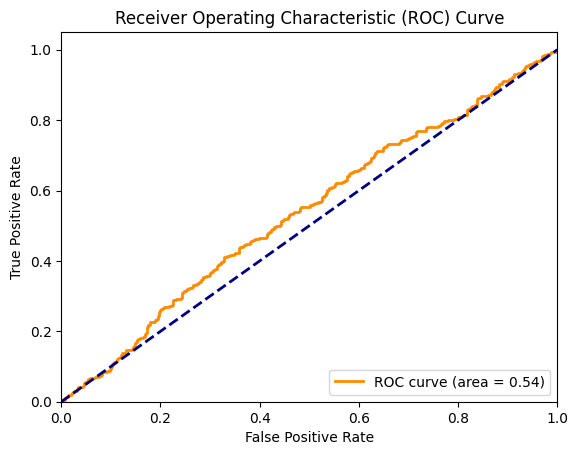

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# calculate on roc curve
fpr, tpr, thresholds = roc_curve(Y_numeric, log_reg_probs[:, 1])
roc_auc = auc(fpr, tpr)

# plot roc curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


As we recall, none of the p-values for the predictors were particularly small, even the smallest one which corresponded to `Lag1`. Since using predictors that have no relationship with the response increase the variance of a model without a corresponding decrease in bias, they therefore tend to negatively impact the test error rate. Let's try refitting the logistic regression using just `Lag1` and `Lag2`, which seemed to have the highest predictive power in the original logistic regression model. Again we start by doing this with StatsModels.

In [ ]:
# Using the Logit class from StatsModels, and training only on the training set
# Separate out the training and test sets
# Then encode the response numerically
train_mask = (Smarket["Year"] < 2005)
train_Y = (Smarket.loc[train_mask, "Direction"] == "Up").astype("int64")
train_X = sm.add_constant(Smarket.loc[train_mask, ["Lag1", "Lag2"]])
test_Y = Smarket.loc[~train_mask, "Direction"]
test_X = sm.add_constant(Smarket.loc[~train_mask, ["Lag1", "Lag2"]])

# Fit logistic regression model using the training set
logit_mod = sm.Logit(train_Y, train_X)
logit_res = logit_mod.fit()

# Test the model using the held-out test set
logit_test_probs = logit_res.predict(test_X)
logit_test_preds = pd.Series(logit_test_probs).apply(lambda x: "Up" if (x > 0.5) else "Down")
pd.DataFrame(confusion_matrix(test_Y, logit_test_preds),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


,PredDown,PredUp
ActualDown,35,76
ActualUp,35,106


Now we repeat the process using scikit-learn.

In [ ]:
# Using LogisticRegression from scikit-learn
# First separate out the training and test sets
X_train = Smarket.loc[train_mask, ["Lag1", "Lag2"]]
y_train = Smarket.loc[train_mask, "Direction"]
X_test = Smarket.loc[~train_mask, ["Lag1", "Lag2"]]
y_test = Smarket.loc[~train_mask, "Direction"]

# Fit the model using the training set
log_reg = LogisticRegression(penalty = None, solver = "lbfgs")
log_reg.fit(X_train, y_train)

#Test the model using the held-out test set
log_reg_pred = log_reg.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, log_reg_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,35,76
ActualUp,35,106


In [ ]:
log_reg.score(X_test, y_test)

0.5595238095238095

In [ ]:
log_reg_pred_numeric = np.where(log_reg_pred == 'Up', 1, 0)

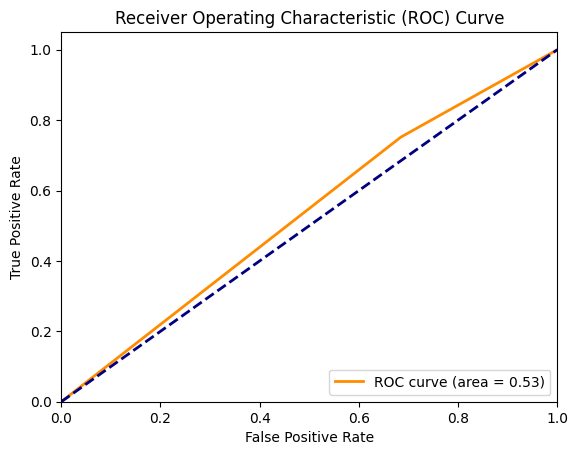

In [ ]:
# calculate on roc curve
fpr, tpr, thresholds = roc_curve(y_test.map({'Up': 1, 'Down': 0}), log_reg_pred_numeric)
roc_auc = auc(fpr, tpr)

# plot roc curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


report = classification_report(y_test.map({'Up': 1, 'Down': 0}), log_reg_pred_numeric, output_dict=True)

precision = report['1']['precision']
sensitivity = report['1']['recall']  # recall for the positive class
f1 = report['1']['f1-score']


tn, fp, fn, tp = confusion_matrix(y_test.map({'Up': 1, 'Down': 0}), log_reg_pred_numeric).ravel()
specificity = tn / (tn + fp)

print(f'Precision: {precision}')
print(f'Sensitivity (Recall): {sensitivity}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')


Precision: 0.5824175824175825
Sensitivity (Recall): 0.75177304964539
F1 Score: 0.6563467492260062
Specificity: 0.3153153153153153


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


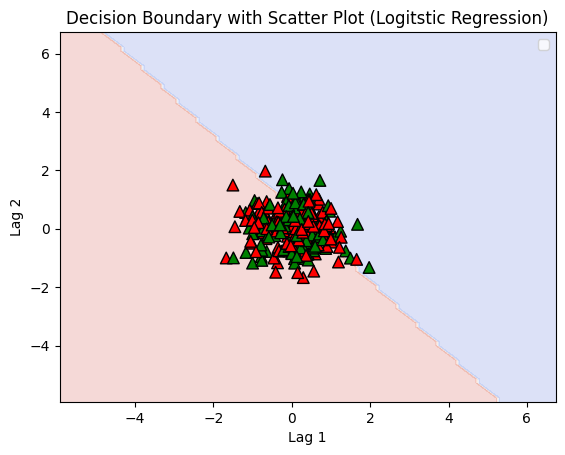

In [ ]:
import matplotlib.colors as mcolors

x_min, x_max = X[['Lag1','Lag2']].iloc[:,0].min() - 1, X[['Lag1','Lag2']].iloc[:,0].max() + 1
y_min, y_max = X[['Lag1','Lag2']].iloc[:,1].min() - 1, X[['Lag1','Lag2']].iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z_numeric = np.where(Z == 'Up', 1, 0)

plt.contourf(xx, yy, Z_numeric, alpha=0.2, cmap=plt.cm.coolwarm)

cmap = mcolors.ListedColormap(['green', 'red'])
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.map({'Up': 1, 'Down': 0}),cmap=cmap, marker='o', s=50, label="Train", edgecolor='k')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.map({'Up': 1, 'Down': 0}), marker='^', s=70, edgecolor='k', cmap=cmap)

plt.xlabel('Lag 1')
plt.ylabel('Lag 2')
plt.legend()
plt.title("Decision Boundary with Scatter Plot (Logitstic Regression)")
plt.show()

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_mask = (Smarket["Year"] < 2005)
X_train = Smarket.loc[train_mask, ["Lag1", "Lag2"]]
y_train = Smarket.loc[train_mask, "Direction"]
X_test = Smarket.loc[~train_mask, ["Lag1", "Lag2"]]
y_test = Smarket.loc[~train_mask, "Direction"]

# Fit the QDA model using the training set
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Prior probabilities for the classes
pd.Series(lda_clf.priors_, index = lda_clf.classes_)

,0
Down,0.491984
Up,0.508016


In [ ]:
# Group means for each predictor within each class
pd.DataFrame(lda_clf.means_, index = lda_clf.classes_, columns = X_train.columns)

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [ ]:
lda_pred =lda_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, lda_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,35,76
ActualUp,35,106


In [ ]:
lda_clf.score(X_test, y_test)

0.5595238095238095

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


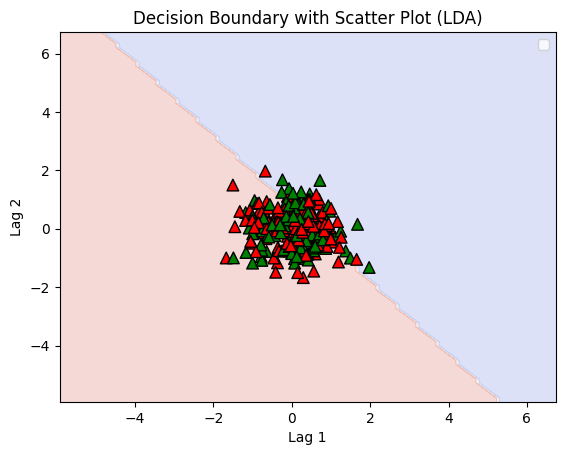

In [ ]:
import matplotlib.colors as mcolors

x_min, x_max = X[['Lag1','Lag2']].iloc[:,0].min() - 1, X[['Lag1','Lag2']].iloc[:,0].max() + 1
y_min, y_max = X[['Lag1','Lag2']].iloc[:,1].min() - 1, X[['Lag1','Lag2']].iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


Z = lda_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z_numeric = np.where(Z == 'Up', 1, 0)

plt.contourf(xx, yy, Z_numeric, alpha=0.2, cmap=plt.cm.coolwarm)

cmap = mcolors.ListedColormap(['green', 'red'])
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.map({'Up': 1, 'Down': 0}),cmap=cmap, marker='o', s=50, label="Train", edgecolor='k')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.map({'Up': 1, 'Down': 0}), marker='^', s=70, edgecolor='k', cmap=cmap)

plt.xlabel('Lag 1')
plt.ylabel('Lag 2')
plt.legend()
plt.title("Decision Boundary with Scatter Plot (LDA)")
plt.show()

## Quadratic Discriminant Analysis

Next, let's fit a quadratic discriminant analysis (QDA) model to the Smarket data. QDA is also part of `sklearn.discriminant_analysis` as the `QuadraticDiscriminantAnalysis()` class. It uses the same syntax as that of `LinearDiscriminantAnalysis`, though it doesn't have the option to choose a solver aside from singular value decomposition.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# First separate out the training and test sets
X_train = Smarket.loc[train_mask, ["Lag1", "Lag2"]]
y_train = Smarket.loc[train_mask, "Direction"]
X_test = Smarket.loc[~train_mask, ["Lag1", "Lag2"]]
y_test = Smarket.loc[~train_mask, "Direction"]

# Fit the QDA model using the training set
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
# Prior probabilities for the classes
pd.Series(qda_clf.priors_, index = qda_clf.classes_)

,0
Down,0.491984
Up,0.508016


In [ ]:
# Group means for each predictor within each class
pd.DataFrame(qda_clf.means_, index = qda_clf.classes_, columns = X_train.columns)

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [ ]:
qda_pred = qda_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, qda_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,30,81
ActualUp,20,121


In [ ]:
qda_clf.score(X_test, y_test)

0.5992063492063492

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


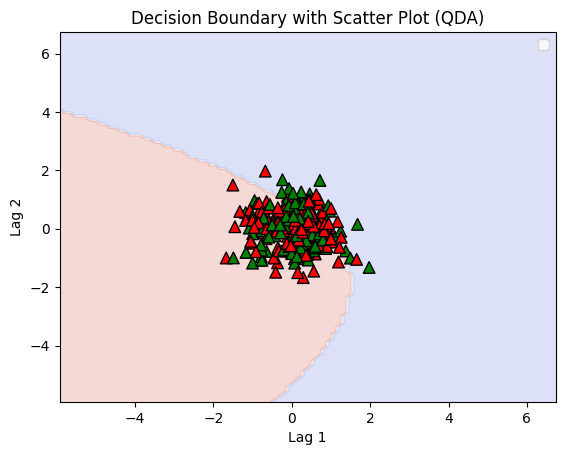

In [ ]:
import matplotlib.colors as mcolors

x_min, x_max = X[['Lag1','Lag2']].iloc[:,0].min() - 1, X[['Lag1','Lag2']].iloc[:,0].max() + 1
y_min, y_max = X[['Lag1','Lag2']].iloc[:,1].min() - 1, X[['Lag1','Lag2']].iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


Z = qda_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z_numeric = np.where(Z == 'Up', 1, 0)

plt.contourf(xx, yy, Z_numeric, alpha=0.2, cmap=plt.cm.coolwarm)

cmap = mcolors.ListedColormap(['green', 'red'])
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.map({'Up': 1, 'Down': 0}),cmap=cmap, marker='o', s=50, label="Train", edgecolor='k')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.map({'Up': 1, 'Down': 0}), marker='^', s=70, edgecolor='k', cmap=cmap)

plt.xlabel('Lag 1')
plt.ylabel('Lag 2')
plt.legend()
plt.title("Decision Boundary with Scatter Plot (QDA)")
plt.show()